In [276]:
# A few basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset

In [277]:
data = pd.read_csv("data.csv")

#Check datatypes to see if any dtype preprocessing is necessary i.e. label encoder
data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
status                int64
dtype: object

In [278]:
#from sklearn.preprocessing import LabelEncoder

X = data.iloc[:, 1:23].values
y = data.iloc[:,23].values    #Status binary 0: no, 1: yes
#le = LabelEncoder()
#y = le.fit_transform(y)
#le.classes_

# Split the Dataset

## Use holdout + cross-validation splitting fashion

We want to split the data using holdout and cross-validation into training and test subsets. Therefore, we will use the train_test_split function from sklearn's model_selection module. Make test subset 20% of the entire dataset.

In [279]:
from sklearn.model_selection import train_test_split

#Split using Holdout cross-validation method
#test_size = 0.20 to make 20% of data the test data

X_train, X_test, y_train, y_test = \
    train_test_split(X,y,
                     test_size=0.20,   
                     stratify=y,
                     random_state=1)

In [280]:
#Check the shapes of the training and test data subsets
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (156, 22)
Y_train shape:  (156,)
X_test shape:  (39, 22)
Y_test shape:  (39,)


## Using grid search, run KNN algorithm on dataset and find optimal K value

In [281]:
#Imports for grid search and k-nearest neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [282]:
#knn = KNeighborsClassifier(n_neighbors=k)
k_range=[4, 5, 6, 7, 8, 9, 10] 
param_grid = dict(n_neighbors=k_range)



# instantiate the grid, assume 10-fold cross-validation (cv=10)
gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')

# fit the grid to the training data
gs.fit(X_train, y_train)

#Print out optimal score and the associated k value
print(gs.best_score_)
print(gs.best_params_)


0.8012820512820513
{'n_neighbors': 6}


The output from the above cell shows that the optimal K-value is 6, and the associated score is 0.801. Now we want to print out the entire set of grid_scores to quickly check if there are any other k-values with similar scores.

In [283]:
#Print out cv_results to see if any other optimal k values
gs.grid_scores_

/Users/Ryan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.77564, std: 0.09329, params: {'n_neighbors': 4},
 mean: 0.77564, std: 0.06336, params: {'n_neighbors': 5},
 mean: 0.80128, std: 0.06369, params: {'n_neighbors': 6},
 mean: 0.80128, std: 0.07649, params: {'n_neighbors': 7},
 mean: 0.80128, std: 0.07990, params: {'n_neighbors': 8},
 mean: 0.79487, std: 0.08571, params: {'n_neighbors': 9},
 mean: 0.79487, std: 0.08749, params: {'n_neighbors': 10}]

Note that k=6,7,8 all have the highest mean score, but k=6 has the lowest standard deviation of the three so it is chosen as the most optimal.

## Fit the best estimator given by the grid search to the training data and print the accuracy when scored on the test data

In [284]:
#Make a variable clf that holds the best estimator from the gridsearch
#Use the best estimator on the test set, print accuracy
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.2f' % clf.score(X_test, y_test))

Test accuracy: 0.85


# Plot learning and validation curves

For the learning curve, use best estimator from the grid search as the estimator. For the validation curve, use the grid search estimator, and change n_neighbors based on the k values given in the problem statement (i.e. k={4, 5, 6, 7, 8, 9, 10}). For both curves, assume 10-fold cross-validation similar to that which was assumed for the grid search.

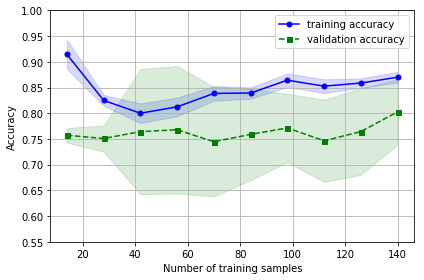

In [285]:
#Plot the learning curve from using clf as the estimator

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
#from sklearn.model_selection import ShuffleSplit


#cv = ShuffleSplit(n_splits=30, test_size=0.2, random_state=1)
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=clf,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim([0.55, 1.0])
plt.tight_layout()
plt.show()

Learning curve shows that training and cross-validation accuracy are both moderate to low, which indicates that the model underfits the data. This is expected since KNN is a 'lazy' ML algorithm that can be too simple. 

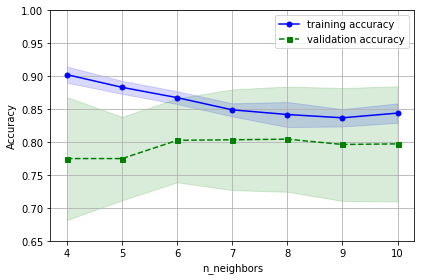

In [286]:
from sklearn.model_selection import validation_curve


param_range = [4, 5, 6, 7, 8, 9, 10]
train_scores, test_scores = validation_curve(
                estimator=gs.estimator, 
                X=X_train, 
                y=y_train, 
                param_name='n_neighbors',
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.legend(loc='upper right')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.ylim([0.65, 1.0])
plt.tight_layout()

plt.show()

This validation curve shows that the n_neighbors that corresponds to the maximum mean validation accuracy with the lowest standard deviation is 6. This is in agreement with the results from the grid search, as the optimal k value was shown to be 6. 